<a href="https://colab.research.google.com/github/19greg96/yolo-onlab/blob/master/onlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!git clone https://github.com/19greg96/yolo-onlab

fatal: destination path 'yolo-onlab' already exists and is not an empty directory.


In [0]:
!ls

sample_data  yolo-onlab


In [0]:
import os
os.chdir('yolo-onlab/darknet-master/')

In [0]:
!ls

3rdparty	  data			 LICENSE	src
build		  image_yolov2.sh	 Makefile	video_v2.sh
cfg		  image_yolov3.sh	 net_cam_v3.sh	video_yolov3.sh
darknet.py	  include		 README.md	voc.names
darknet_video.py  json_mjpeg_streams.sh  scripts


In [0]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/  -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -fopenmp -DGPU -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool MJPG_sender::write(const cv::Mat&)’:
./src/http_stream.cpp:256:23: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
                 if (n < outlen)
                     ~~^~~~~~~~
./src/http_stream.cpp: In member function ‘void JSON_sender::close_all()’:
./src/http_stream.cpp:330:20: warning: ISO C++ forbids converting a string constant to ‘char*’ [-Wwrite-strings]
         write("\n]");   // close JSON array
                    ^
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(char*)’:
./src/http_stream.cpp:422:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n

# Train

In [0]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

--2019-02-21 15:31:30--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  22.4MB/s    in 2m 0s   

2019-02-21 15:33:31 (15.9 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2019-02-21 15:33:32--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  23.2MB/s    in 21s     

2019-02-21 15:33:53 (20.9 MB/s) 

In [0]:
!wget https://pjreddie.com/media/files/voc_label.py
!python voc_label.py

--2019-02-21 15:34:38--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2019-02-21 15:34:38 (326 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [0]:
!cat 2007_train.txt 2007_val.txt 2012_*.txt > train.txt

# Train YoloV3 darknet53 model

In [0]:
!rm darknet53.conv.74.*
!rm darknet.weights.*

rm: cannot remove 'darknet53.conv.74.*': No such file or directory
rm: cannot remove 'darknet.weights.*': No such file or directory


In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-02-19 19:01:44--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  39.9MB/s    in 4.1s    

2019-02-19 19:01:48 (37.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg darknet53.conv.74

yolov3-voc
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8            

# Train YoloV3 Tiny

In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2019-02-21 15:34:51--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  11.5MB/s    in 2.9s    

2019-02-21 15:34:54 (11.5 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [13]:
!./darknet detector train cfg/voc.data cfg/yolo3-tiny-voc.cfg yolov3-tiny.conv.15 -map -dont_show

 Prepare additional network for mAP calculation...
layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 

In [0]:
!ls backup/

2007_test.txt	darknet_video.py       results
2007_train.txt	data		       scripts
2007_val.txt	image_yolov2.sh        src
2012_train.txt	image_yolov3.sh        train.txt
2012_val.txt	include		       video_v2.sh
3rdparty	json_mjpeg_streams.sh  video_yolov3.sh
backup		LICENSE		       VOCdevkit
build		Makefile	       voc_label.py
cfg		net_cam_v3.sh	       voc.names
chart.png	obj		       VOCtest_06-Nov-2007.tar
darknet		predictions.jpg        VOCtrainval_06-Nov-2007.tar
darknet.py	README.md	       VOCtrainval_11-May-2012.tar


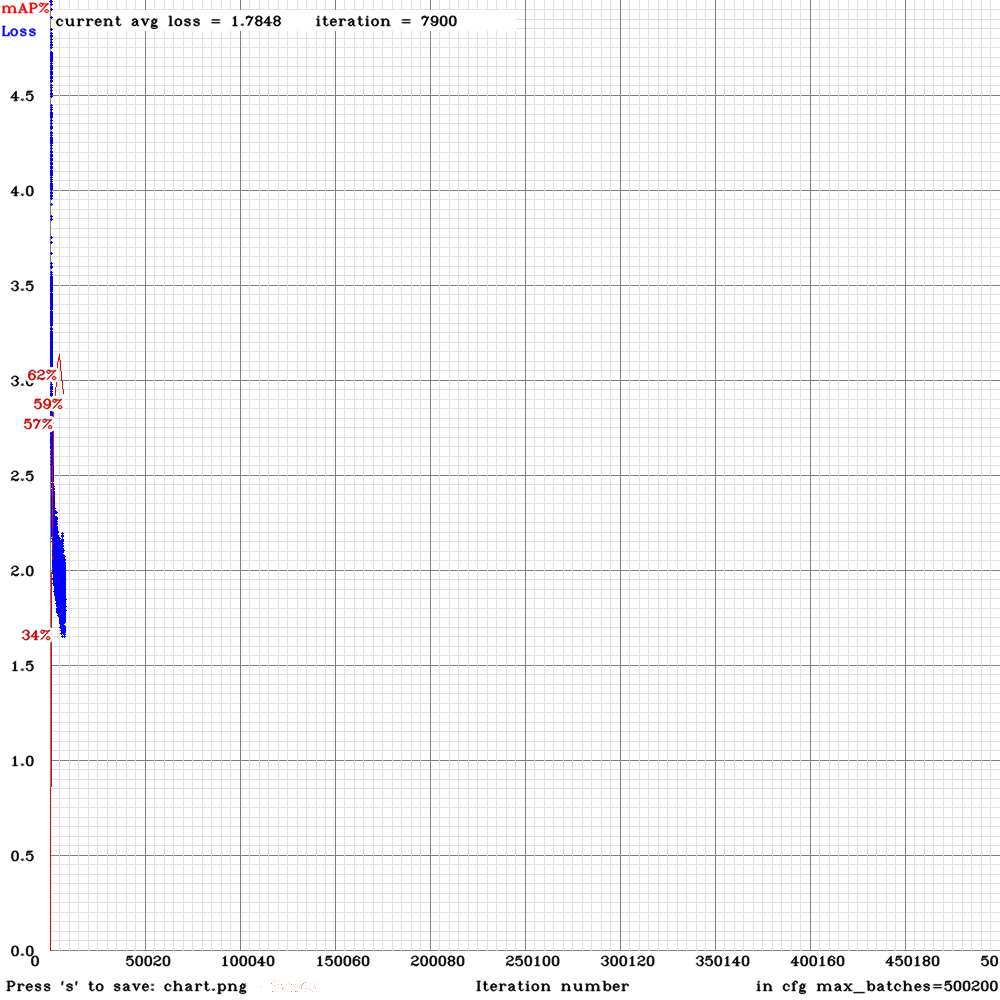

In [14]:
from IPython.display import Image
Image('chart.png')

# Run

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-02-17 17:00:18--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  72.0MB/s    in 3.5s    

2019-02-17 17:00:22 (67.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [15]:
!./darknet detector test cfg/voc.data cfg/yolo3-tiny-voc.cfg backup/yolo3-tiny-voc_last.weights data/dog.jpg

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [0]:
!ls

backup	  include	 LICENSE.gen   Makefile		results
cfg	  libdarknet.a	 LICENSE.gpl   obj		scripts
darknet   libdarknet.so  LICENSE.meta  predictions.jpg	src
data	  LICENSE	 LICENSE.mit   python		yolov3.weights
examples  LICENSE.fuck	 LICENSE.v1    README.md


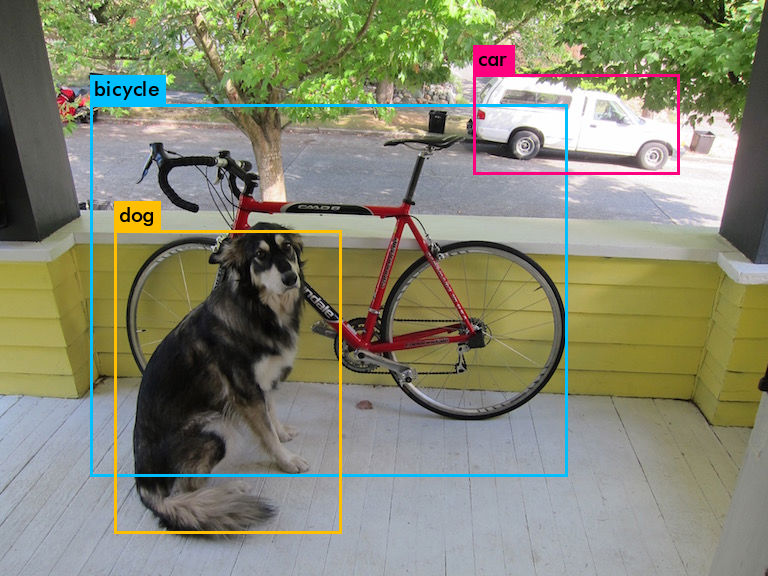

In [16]:
from IPython.display import Image
Image('predictions.jpg')

In [0]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights


--2019-02-17 17:00:58--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  49.4MB/s    in 0.7s    

2019-02-17 17:00:59 (49.4 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
!./darknet detect cfg/yolov3-tiny.cfg backup/yolov3-tiny_900.weights data/dog.jpg


Couldn't open file: data/coco.names


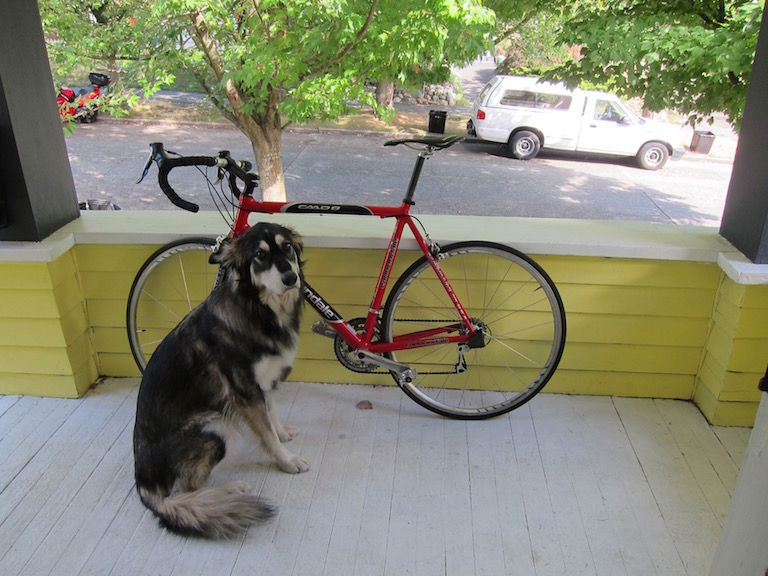

In [0]:
from IPython.display import Image
Image('predictions.jpg')

In [0]:
!ls cfg


alexnet.cfg	     imagenet1k.data		   vgg-16.cfg
cifar.cfg	     imagenet22k.dataset	   vgg-conv.cfg
cifar.test.cfg	     imagenet9k.hierarchy.dataset  voc.data
coco.data	     jnet-conv.cfg		   writing.cfg
combine9k.data	     openimages.data		   yolo9000.cfg
darknet19_448.cfg    resnet101.cfg		   yolov1.cfg
darknet19.cfg	     resnet152.cfg		   yolov1-tiny.cfg
darknet53_448.cfg    resnet18.cfg		   yolov2.cfg
darknet53.cfg	     resnet34.cfg		   yolov2-tiny.cfg
darknet9000.cfg      resnet50.cfg		   yolov2-tiny-voc.cfg
darknet.cfg	     resnext101-32x4d.cfg	   yolov2-voc.cfg
densenet201.cfg      resnext152-32x4d.cfg	   yolov3.cfg
extraction22k.cfg    resnext50.cfg		   yolov3-openimages.cfg
extraction.cfg	     rnn.cfg			   yolov3-spp.cfg
extraction.conv.cfg  rnn.train.cfg		   yolov3-tiny.cfg
go.cfg		     strided.cfg		   yolov3-voc.cfg
go.test.cfg	     t1.test.cfg
gru.cfg		     tiny.cfg


In [0]:
!wget http://pjreddie.com/media/files/darknet.weights

URL transformed to HTTPS due to an HSTS policy
--2019-02-17 17:01:47--  https://pjreddie.com/media/files/darknet.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29293936 (28M) [application/octet-stream]
Saving to: ‘darknet.weights.2’

darknet.weights.2   100%[===================>]  27.94M  45.2MB/s    in 0.6s    

2019-02-17 17:01:48 (45.2 MB/s) - ‘darknet.weights.2’ saved [29293936/29293936]



In [0]:
!./darknet detect cfg/darknet.cfg darknet.weights data/dog.jpg


layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   256 x 256 x   3   ->   256 x 256 x  16  0.057 BFLOPs
    1 max          2 x 2 / 2   256 x 256 x  16   ->   128 x 128 x  16
    2 conv     32  3 x 3 / 1   128 x 128 x  16   ->   128 x 128 x  32  0.151 BFLOPs
    3 max          2 x 2 / 2   128 x 128 x  32   ->    64 x  64 x  32
    4 conv     64  3 x 3 / 1    64 x  64 x  32   ->    64 x  64 x  64  0.151 BFLOPs
    5 max          2 x 2 / 2    64 x  64 x  64   ->    32 x  32 x  64
    6 conv    128  3 x 3 / 1    32 x  32 x  64   ->    32 x  32 x 128  0.151 BFLOPs
    7 max          2 x 2 / 2    32 x  32 x 128   ->    16 x  16 x 128
    8 conv    256  3 x 3 / 1    16 x  16 x 128   ->    16 x  16 x 256  0.151 BFLOPs
    9 max          2 x 2 / 2    16 x  16 x 256   ->     8 x   8 x 256
   10 conv    512  3 x 3 / 1     8 x   8 x 256   ->     8 x   8 x 512  0.151 BFLOPs
   11 max          2 x 2 / 2     8 x   8 x 512   ->     4 x   4 x 512
   12 con